In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/ML_Lab/cancer_data.csv"

In [3]:
import pandas as pd

df = pd.read_csv(file_path)
df.head()

,Id,WBC_area,WBC_convex_area,WBC_peri,ecc_wbc,solidity_wbc,orient_wbc,nuc_area,nuc_ratio,peri_nuc,...,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,entropy_cyt,minoraxis,majoraxis,minoraxis_nuc,majoraxis_nuc,axismeanratio,Diagnosis
0,1,10073,10170,397.525,0.471852,0.990462,84.266745,7670,0.761441,344.139,...,130.713275,123.667915,145.271328,-29.556808,108.497299,123.057794,90.427364,108.957290,1.718868,M
1,2,450,450,83.916,0.866025,1.000000,0.000000,204,0.453333,82.255,...,115.975610,67.243902,140.126016,-3.650864,17.320508,34.641016,14.005658,26.951812,1.586649,B
2,3,10349,10506,413.412,0.211948,0.985056,-7.032837,8092,0.781911,327.046,...,135.955693,129.935312,144.863093,-25.080685,116.237091,118.939275,100.504110,102.755103,1.728577,M
3,4,10827,10862,401.949,0.215046,0.996778,-56.467459,8326,0.769003,355.255,...,131.139544,122.655338,143.148741,-29.023241,118.451811,121.289517,102.269262,104.048451,1.721235,M
4,5,3421,3470,247.499,0.884772,0.985879,-7.053928,2582,0.754750,217.886,...,150.808105,142.667461,176.097735,-15.562377,46.218970,99.177380,41.875873,85.638339,1.769519,M


# M -> 1
# B -> 0

In [4]:
df["Diagnosis"] = df["Diagnosis"].map({
    "M" : 1,
    "B" : 0
})
df.head()

,Id,WBC_area,WBC_convex_area,WBC_peri,ecc_wbc,solidity_wbc,orient_wbc,nuc_area,nuc_ratio,peri_nuc,...,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,entropy_cyt,minoraxis,majoraxis,minoraxis_nuc,majoraxis_nuc,axismeanratio,Diagnosis
0,1,10073,10170,397.525,0.471852,0.990462,84.266745,7670,0.761441,344.139,...,130.713275,123.667915,145.271328,-29.556808,108.497299,123.057794,90.427364,108.957290,1.718868,1
1,2,450,450,83.916,0.866025,1.000000,0.000000,204,0.453333,82.255,...,115.975610,67.243902,140.126016,-3.650864,17.320508,34.641016,14.005658,26.951812,1.586649,0
2,3,10349,10506,413.412,0.211948,0.985056,-7.032837,8092,0.781911,327.046,...,135.955693,129.935312,144.863093,-25.080685,116.237091,118.939275,100.504110,102.755103,1.728577,1
3,4,10827,10862,401.949,0.215046,0.996778,-56.467459,8326,0.769003,355.255,...,131.139544,122.655338,143.148741,-29.023241,118.451811,121.289517,102.269262,104.048451,1.721235,1
4,5,3421,3470,247.499,0.884772,0.985879,-7.053928,2582,0.754750,217.886,...,150.808105,142.667461,176.097735,-15.562377,46.218970,99.177380,41.875873,85.638339,1.769519,1


In [5]:
X = df.drop(["Id", "Diagnosis"], axis = 1)
y = df["Diagnosis"]

In [6]:
X.head()

,WBC_area,WBC_convex_area,WBC_peri,ecc_wbc,solidity_wbc,orient_wbc,nuc_area,nuc_ratio,peri_nuc,round_nuc,...,convex_area_nuc,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,entropy_cyt,minoraxis,majoraxis,minoraxis_nuc,majoraxis_nuc,axismeanratio
0,10073,10170,397.525,0.471852,0.990462,84.266745,7670,0.761441,344.139,0.813837,...,7930,130.713275,123.667915,145.271328,-29.556808,108.497299,123.057794,90.427364,108.957290,1.718868
1,450,450,83.916,0.866025,1.000000,0.000000,204,0.453333,82.255,0.378892,...,312,115.975610,67.243902,140.126016,-3.650864,17.320508,34.641016,14.005658,26.951812,1.586649
2,10349,10506,413.412,0.211948,0.985056,-7.032837,8092,0.781911,327.046,0.950710,...,8232,135.955693,129.935312,144.863093,-25.080685,116.237091,118.939275,100.504110,102.755103,1.728577
3,10827,10862,401.949,0.215046,0.996778,-56.467459,8326,0.769003,355.255,0.829022,...,8593,131.139544,122.655338,143.148741,-29.023241,118.451811,121.289517,102.269262,104.048451,1.721235
4,3421,3470,247.499,0.884772,0.985879,-7.053928,2582,0.754750,217.886,0.683451,...,2627,150.808105,142.667461,176.097735,-15.562377,46.218970,99.177380,41.875873,85.638339,1.769519


In [7]:
y[:5]

,Diagnosis
0,1
1,0
2,1
3,1
4,1


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.50646876,  0.50563813,  0.57847107, -0.32554849,  0.32610164,
         1.57434138,  0.60431151,  0.55413699,  0.38118481,  0.76924137,
        -0.00870345,  0.62792245,  0.52283796,  0.11932716,  0.48010193,
         0.00374397, -0.57973783,  0.58951251,  0.44448733,  0.58443297,
         0.46098038,  0.01613218],
       [-1.64036804, -1.65215377, -2.19642359,  1.19705509,  1.19385378,
        -0.04969887, -1.67023463, -2.46503116, -2.18063568, -1.41101276,
         1.02468555, -2.17735424, -1.6839212 , -0.83297784, -1.60644022,
        -0.26215721,  1.88422366, -1.77574438, -2.40979872, -1.88035557,
        -2.37037199, -2.14807013],
       [ 0.5680428 ,  0.58022847,  0.71904341, -1.32950221, -0.16573308,
        -0.18524   ,  0.73287546,  0.75472184,  0.21397644,  1.45534607,
        -1.22743701,  0.76918661,  0.61032041,  0.45807695,  0.71186829,
        -0.01735294, -0.15400562,  0.79029383,  0.31153257,  0.90943286,
         0.24684131,  0.17504083],
       [ 0.67468189

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [10]:
knn_score = knn.score(X_scaled, y)
knn_score

0.9

In [12]:
predictions = knn.predict(X_scaled)
predictions

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [15]:
y_pred = []
y_true = []

for pred in predictions:
  if pred == 1:
    y_pred.append("M")
  else:
    y_pred.append("B")

for pred in y.to_list():
  if pred == 1:
    y_true.append("M")
  else:
    y_true.append("B")

print(f"Predicted Values: {y_pred}")
print(f"Actual Values:    {y_true}")

Predicted Values: ['M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B']
Actual Values:    ['M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B']


## KMeans

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 42, n_init = 10)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [19]:
predictions = kmeans.predict(X_scaled)

In [27]:
y_pred = []
y_true = []

for pred in predictions:
  if pred == 1:
    y_pred.append("B")
  else:
    y_pred.append("M")

for pred in y.to_list():
  if pred == 1:
    y_true.append("M")
  else:
    y_true.append("B")

print(f"Predicted Values: {y_pred}")
print(f"Actual Values:    {y_true}")

Predicted Values: ['M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M']
Actual Values:    ['M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B']


In [23]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

In [24]:
y.to_list()

[1, 0, 1, 1, 1, 0, 0, 1, 1, 0]

In [25]:
kmeans.cluster_centers_

array([[ 0.75216999,  0.75068367,  0.72215357, -0.57798204,  0.38456689,
         0.23581504,  0.76872307,  0.32203135,  0.64777943,  0.55310244,
        -0.39738901,  0.39944212,  0.7546761 ,  0.27296518,  0.29447048,
         0.13926126, -0.70498488,  0.74963173,  0.62528282,  0.7350914 ,
         0.58815064, -0.21378683],
       [-1.12825499, -1.1260255 , -1.08323036,  0.86697307, -0.57685034,
        -0.35372255, -1.15308461, -0.48304703, -0.97166915, -0.82965366,
         0.59608351, -0.59916317, -1.13201415, -0.40944777, -0.44170572,
        -0.20889189,  1.05747733, -1.12444759, -0.93792423, -1.1026371 ,
        -0.88222596,  0.32068025]])

Text(0, 0.5, 'Feature 2')

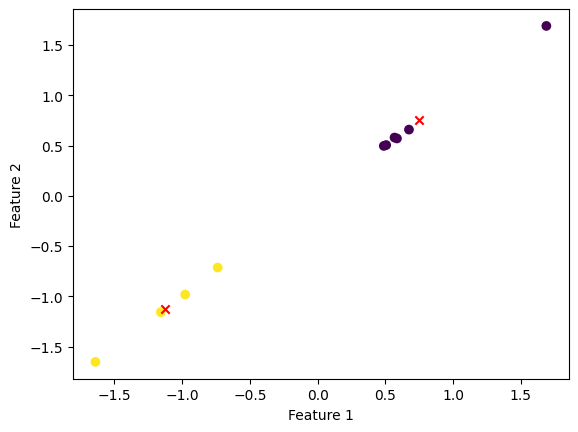

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:,0], X_scaled[:, 1], c = predictions)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "red", marker = "x")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

## KModes

In [28]:
!pip install kmodes

In [29]:
from kmodes.kmodes import KModes

In [30]:
X.head()

,WBC_area,WBC_convex_area,WBC_peri,ecc_wbc,solidity_wbc,orient_wbc,nuc_area,nuc_ratio,peri_nuc,round_nuc,...,convex_area_nuc,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,entropy_cyt,minoraxis,majoraxis,minoraxis_nuc,majoraxis_nuc,axismeanratio
0,10073,10170,397.525,0.471852,0.990462,84.266745,7670,0.761441,344.139,0.813837,...,7930,130.713275,123.667915,145.271328,-29.556808,108.497299,123.057794,90.427364,108.957290,1.718868
1,450,450,83.916,0.866025,1.000000,0.000000,204,0.453333,82.255,0.378892,...,312,115.975610,67.243902,140.126016,-3.650864,17.320508,34.641016,14.005658,26.951812,1.586649
2,10349,10506,413.412,0.211948,0.985056,-7.032837,8092,0.781911,327.046,0.950710,...,8232,135.955693,129.935312,144.863093,-25.080685,116.237091,118.939275,100.504110,102.755103,1.728577
3,10827,10862,401.949,0.215046,0.996778,-56.467459,8326,0.769003,355.255,0.829022,...,8593,131.139544,122.655338,143.148741,-29.023241,118.451811,121.289517,102.269262,104.048451,1.721235
4,3421,3470,247.499,0.884772,0.985879,-7.053928,2582,0.754750,217.886,0.683451,...,2627,150.808105,142.667461,176.097735,-15.562377,46.218970,99.177380,41.875873,85.638339,1.769519


In [31]:
y[:5]

,Diagnosis
0,1
1,0
2,1
3,1
4,1


In [32]:
kmode = KModes(n_clusters = 2, init = "random", random_state = 42, n_init = 5)
kmode.fit(X)

KModes(init='random', n_clusters=2, n_init=5, random_state=42)

In [34]:
predictions = kmode.predict(X)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

## PCA

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [42]:
pca.explained_variance_ratio_

array([0.57387885, 0.19700657])

In [43]:
X_pca

array([[ 2.13558912,  0.44349111],
       [-7.54687792, -0.54870218],
       [ 2.71268858, -0.28841426],
       [ 2.7974036 , -0.83401176],
       [-1.97174386,  3.57468636],
       [ 1.4451965 , -1.41427667],
       [-3.28231528, -4.34088999],
       [-2.8486076 ,  2.80708346],
       [ 4.54038713, -0.13692074],
       [ 2.01827973,  0.73795466]])

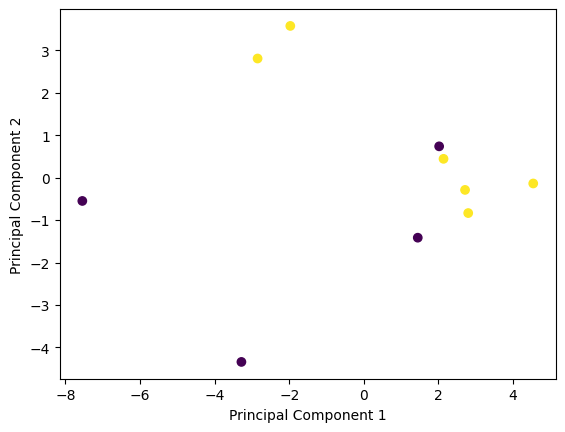

In [45]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## AdaBoost classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 100, random_state = 42)
ada.fit(X_pca, y)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [47]:
ada_score = ada.score(X_pca, y)
ada_score

1.0

In [49]:
predictions = ada.predict(X_pca)
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

In [51]:
y_true = []
y_pred = []

for pred in predictions:
  if pred == 1:
    y_pred.append("M")
  else:
    y_pred.append("B")

for i in y.to_list():
  if i == 1:
    y_true.append("M")
  else:
    y_true.append("B")

print(f"Actual Values:    {y_true}")
print(f"Predicted Values: {y_pred}")


Actual Values:    ['M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B']
Predicted Values: ['M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B']


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00         4
           M       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[4, 0],
       [0, 6]])

In [55]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

Text(0.5, 1.0, 'PCA Scatter Plot (AdaBoost classification)')

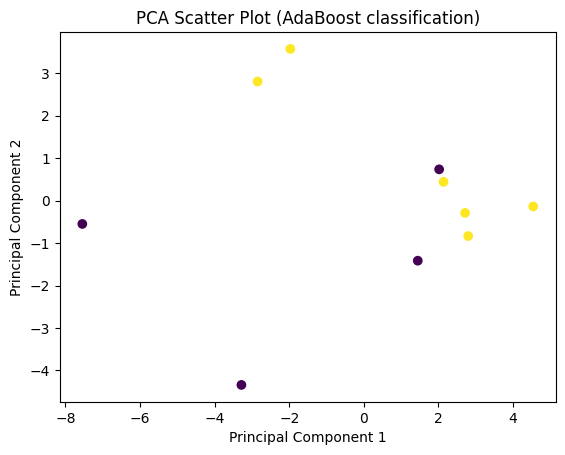

In [57]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=predictions)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (AdaBoost classification)")

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_pca, y)

RandomForestClassifier(random_state=42)

In [59]:
rf_score = rf.score(X_pca, y)
rf_score

1.0